In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

read_in_array = np.loadtxt('/content/drive/My Drive/my_pend.csv', delimiter = ',', skiprows = 0)
print(read_in_array)
time = list(read_in_array[:,0])
position = list(read_in_array[:,1])

[[1.71247e+05 8.00000e+00]
 [1.71269e+05 9.00000e+00]
 [1.71290e+05 9.00000e+00]
 ...
 [1.92345e+05 2.30000e+01]
 [1.92367e+05 2.30000e+01]
 [1.92390e+05 2.30000e+01]]


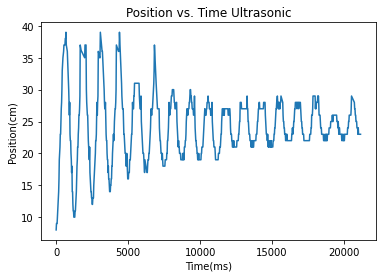

In [ ]:
time = time - time[0]
#tuples = zip(time, position)
tuples = [(i,j) for i,j in zip(time, position) if j < 40]
t = []
p = []

for x in tuples:
  t.append(int(x[0]))
  p.append(int(x[1]))

plt.title("Position vs. Time Ultrasonic")
plt.xlabel("Time(ms)")
plt.ylabel("Position(cm)")
plt.plot(t,p)

In [ ]:
from scipy.optimize import least_squares

guess_amplitude = 80
guess_omega = 2 * np.pi / (1000) #should this be in seconds or milliseconds 
guess_offset = 50
guess_phi = 2 #changed guess_phi to predict better

guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi]
best_parameters = guess_parameters
guess_parameters = np.append(best_parameters, [7000])

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3] - 1.5
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

def get_residuals(parameters, amplitude_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - amplitude_data)
  return residuals

In [ ]:
from scipy.optimize import least_squares

res_lsq = least_squares(get_residuals, guess_parameters, args=(p,np.array(t)))

15.112578405954315
0.005055548928818863
24.461888380212724
4.559859806336116
9325.792433785631


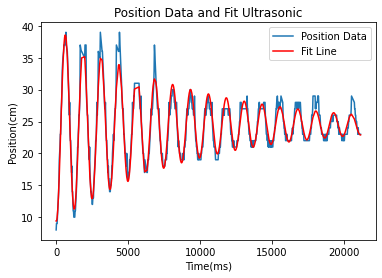

In [ ]:
best_parameters = res_lsq['x']
for i in best_parameters:
  print(i)

fitted_function = cos_fit_fun_damped(best_parameters, np.array(t))
plt.title("Position Data and Fit Ultrasonic")
plt.xlabel("Time(ms)")
plt.ylabel("Position(cm)")
plt.xlabel("Time(ms)")
plt.ylabel("Position(cm)")

fitted_function = cos_fit_fun_damped(best_parameters, np.array(t))
plt.title("Position Data and Fit Ultrasonic")
plt.xlabel("Time(ms)")
plt.ylabel("Position(cm)")
plt.xlabel("Time(ms)")
plt.ylabel("Position(cm)")

plt.plot(t, p, label = "Position Data")
plt.plot(t, fitted_function, color = 'red', label = "Fit Line")
plt.legend()

Text(0, 0.5, 'Position(m)')

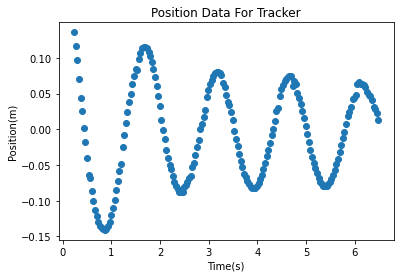

In [ ]:
tracker_data = np.loadtxt('/content/drive/My Drive/my_pend_tracker - Sheet1.csv', delimiter = ",")
tracker_time = tracker_data[:,0]
tracker_position = tracker_data[:,1]
plt.scatter(tracker_time, tracker_position)
plt.title("Position Data For Tracker")
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")

In [ ]:
from scipy.optimize import least_squares

guess_amplitude = 0.1
guess_omega = 2 * np.pi / (1000) #should this be in seconds or milliseconds 
guess_offset = 50
guess_phi = 2 #changed guess_phi to predict better

guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi]
best_parameters = guess_parameters
guess_parameters = np.append(best_parameters, [7000])

In [ ]:
from scipy.optimize import least_squares

res_lsq = least_squares(get_residuals, guess_parameters, args=(tracker_position,np.array(tracker_time)))

0.14459815673681536
4.136964928633795
-0.005540681000429685
1.000987351717955
6.908262028797994


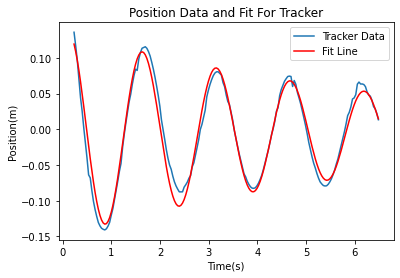

In [ ]:
best_parameters = res_lsq['x']
for i in best_parameters:
  print(i)
fitted_function = cos_fit_fun_damped(best_parameters, np.array(tracker_time))
plt.title("Position Data and Fit For Tracker")
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")

plt.plot(tracker_time, tracker_position, label = 'Tracker Data')
plt.plot(tracker_time, fitted_function, color = 'red', label = "Fit Line")
plt.legend()

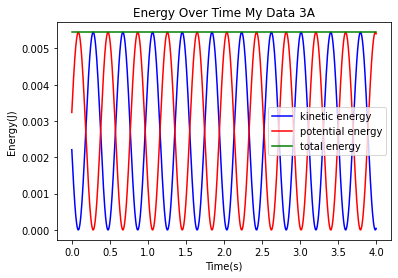

In [ ]:
#Tracker Data
tracker_energy_data = np.loadtxt('/content/drive/My Drive/my_pend_tracker - Sheet2.csv', delimiter = ",")
tracker_energy_time = tracker_energy_data[:,0]
tracker_energy_x = tracker_energy_data[:,1]
tracker_energy_y = tracker_energy_data[:,2]
tracker_energy_theta = np.arctan(tracker_energy_x/tracker_energy_y)
tracker_energy_velx = tracker_energy_data[:,3]
tracker_energy_vel_y = tracker_energy_data[:,4]
tracker_energy_vel = tracker_energy_data[:,5]

#3A MY DATA
'''
Best Amplitude: 0.057993368765105205
Best Omega: 8.04838926241251
Best offset: -0.06027098785125114
Best Phi: 0.8802470721411596
k Value: 3.239
'''

def sin_fit_fun(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.sin(omega * time + phi) + offset
  return y

elapsed_time = np.linspace(0,4,1000)
best_parameters = [0.057993368765105205, 8.04838926241251,  -0.06027098785125114, 0.8802470721411596]
fitted_function = sin_fit_fun(best_parameters, elapsed_time)
vel_fit = best_parameters[0]*best_parameters[1]*np.cos(best_parameters[1]*elapsed_time+best_parameters[3])

def kinetic_energy(m, v):
  return 1/2 * m * (v**2)

def potential_energy(m, x, offset):
  return 1/2 * 3.239 * ((x-offset)**2)


#KE, PE, E for 3A
#calculate m: w = root(k/m), 0.05000264777889434

kinetic_energy_3A = kinetic_energy(0.05000264777889434, vel_fit)
potential_energy_3A = potential_energy(0.05000264777889434, fitted_function, best_parameters[2])
energy_3A = kinetic_energy_3A + potential_energy_3A
plt.title("Energy Over Time My Data 3A")
plt.xlabel("Time(s)")
plt.ylabel("Energy(J)")
plt.plot(elapsed_time, kinetic_energy_3A, color = 'blue', label = 'kinetic energy')
plt.plot(elapsed_time, potential_energy_3A, color = 'red', label = 'potential energy')
plt.plot(elapsed_time, energy_3A, color = 'green', label = 'total energy')
plt.legend()
# plt.plot(elapsed_time, fitted_function)
# plt.plot(elapsed_time, vel_fit, color = 'red')

#the constant energy that is supposed to be there is from the height of the spring?
#q is ratio of the peak energy stored in the resonator in a cycle of oscillation to the energy lost per radian of the cycle.
#q factor should be 1 because total energy is conserved, no damping

Q equals 8.481358744548631


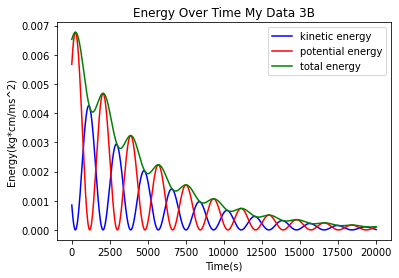

In [ ]:
#3B MyData
#data is in milliseconds and centimeters so convert 
'''
A: 0.08444672225164469
Omega: 0.0017297903772907125
Offset: 0.01200228838979009
Phi: 1.031080716703021
Tau: 9823.25289517204
'''
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3] - 1.5
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

def potential_energy(m, x, offset):
  return 1/2 * 2 * ((x-offset)**2) #had k value switched 

def vel_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3] - 1.5
  tau = parameters[4]
  y = (-a * np.exp(-time / tau) * (tau * omega * np.sin(omega * time + phi) + np.cos(omega * time + phi)))/tau
  return y

elapsed_time = np.linspace(0, 20000, 20000)
best_parameters = [ 0.08444672225164469, 0.0017297903772907125,  0.01200228838979009, 1.031080716703021, 9823.25289517204]
fitted_function = cos_fit_fun_damped(best_parameters, elapsed_time)
velocity_equ = vel_fit_fun_damped(best_parameters, elapsed_time)
grad = np.gradient(fitted_function, elapsed_time)
# plt.plot(elapsed_time, fitted_function)
# plt.plot(elapsed_time, velocity_equ)


#KE, PE, E for 3B
kinetic_energy_3B = kinetic_energy(0.5, velocity_equ) * 10 ** 6 #unit conversion, check units of graph axis 
potential_energy_3B = potential_energy(0.5, fitted_function, best_parameters[2])
energy_3B = kinetic_energy_3B + potential_energy_3B

plt.title("Energy Over Time My Data 3B")
plt.xlabel("Time(s)")
plt.ylabel("Energy(kg*cm/ms^2)")
plt.plot(elapsed_time, kinetic_energy_3B, color = 'blue', label = 'kinetic energy')
plt.plot(elapsed_time, potential_energy_3B, color = 'red', label = 'potential energy')
plt.plot(elapsed_time, energy_3B, color = 'green', label = 'total energy')
plt.legend()
q = 9823.25289517204/2 * np.sqrt(0.0017297903772907125 ** 2 - 1/(9823.25289517204 ** 2))
print("Q equals " + str(q))

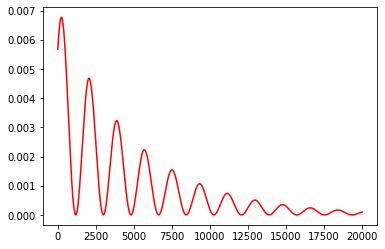

In [ ]:
plt.plot(elapsed_time, potential_energy_3B, color = 'red')

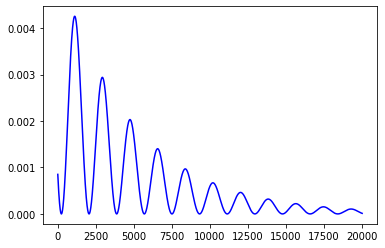

In [ ]:
plt.plot(elapsed_time, kinetic_energy_3B, color = 'blue')

In [ ]:
#Tracker Energy
def kinetic_energy_unit(v):
  return 1/2 * (v**2)


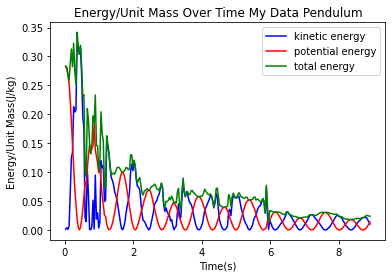

In [ ]:
# cut off first cycles for better data?
tracker_energy_data = np.loadtxt('/content/drive/My Drive/my_pend_tracker - Sheet2.csv', delimiter = ",")
tracker_energy_time = tracker_energy_data[:,0]
tracker_energy_x = tracker_energy_data[:,1]
tracker_energy_y = tracker_energy_data[:,2]
tracker_energy_theta = np.arctan(tracker_energy_x/tracker_energy_y)
tracker_energy_velx = tracker_energy_data[:,3]
tracker_energy_vel_y = tracker_energy_data[:,4]
tracker_energy_vel = tracker_energy_data[:,5]
tracker_energy_x_temp = tracker_energy_x
tracker_energy_time_temp = tracker_energy_time

# tracker_energy_theta = tracker_energy_theta[43:]
# tracker_energy_velx = tracker_energy_velx[43:]
# tracker_energy_time = tracker_energy_time[43:]

pendulum_length = 50/100
pendulum_potential_energy = 9.8 * pendulum_length * (1 - np.cos(tracker_energy_theta))
pendulum_kinetic_energy = kinetic_energy_unit(tracker_energy_velx) #USES VELX NOT VEL, extra noise due to autotracking when using y vel as well
pendulum_energy = pendulum_potential_energy + pendulum_kinetic_energy

def check(k,i):
  if i > 1.5:
    if k < 0.15:
      return True
    else:
      return False
  else:
    return True

arr = [(i, j, k) for i,j,k in zip(tracker_energy_time, pendulum_potential_energy, pendulum_kinetic_energy) if (check(k,i))]
time = []
ke = []
pe = []

for y in arr:
  time.append(float(y[0]))
  pe.append(float(y[1]))
  ke.append(float(y[2]))

plt.title("Energy/Unit Mass Over Time My Data Pendulum")
plt.xlabel("Time(s)")
plt.ylabel("Energy/Unit Mass(J/kg)")
plt.plot(tracker_energy_time, pendulum_kinetic_energy, color = 'blue', label = 'kinetic energy')
plt.plot(tracker_energy_time, pendulum_potential_energy, color = 'red', label = 'potential energy')
plt.plot(tracker_energy_time, pendulum_energy, color = 'green', label = 'total energy')
plt.legend()

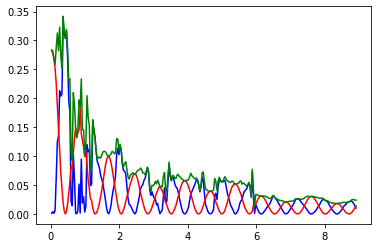

In [ ]:
energy = np.array(ke) + np.array(pe)
plt.margins(0.05)
plt.plot(time, ke, color = 'blue', label = 'kinetic energy')
plt.plot(time, pe, color = 'red', label = 'potential energy')
plt.plot(time, energy, color = 'green', label = 'total energy')

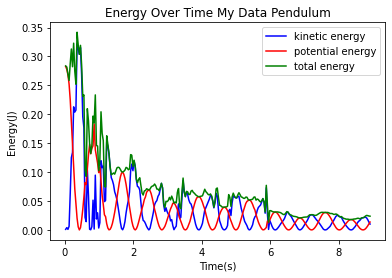

In [ ]:
pendulum_kinetic_energy = kinetic_energy_unit(tracker_energy_vel) #USES VEL
plt.title("Energy Over Time My Data Pendulum")
plt.xlabel("Time(s)")
plt.ylabel("Energy(J)")
plt.plot(tracker_energy_time, ke, color = 'blue', label = 'kinetic energy')
plt.plot(tracker_energy_time, pendulum_potential_energy, color = 'red', label = 'potential energy')
plt.plot(tracker_energy_time, energy, color = 'green', label = 'total energy')
plt.legend()

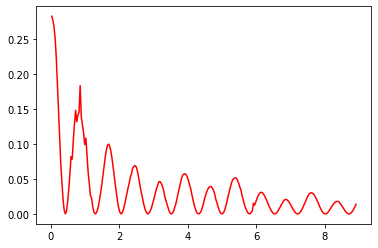

In [ ]:
plt.plot(tracker_energy_time, pendulum_potential_energy, color = 'red')

ValueError: ignored

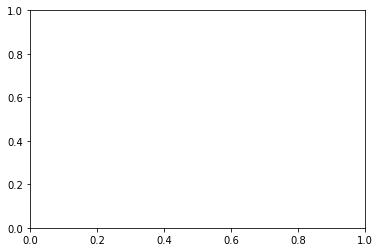

In [ ]:
plt.plot(time, ke, color = 'blue')

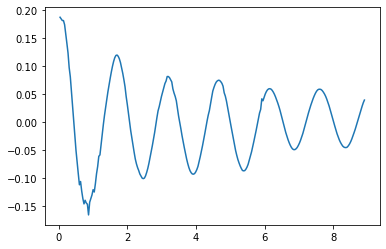

In [ ]:
plt.plot(tracker_energy_time_temp, tracker_energy_x_temp)

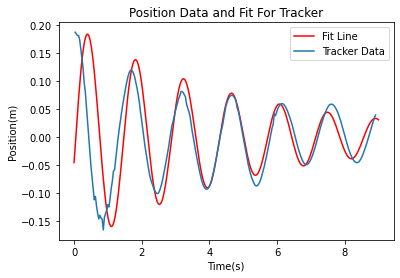

In [ ]:
expected_time = np.linspace(0, 9, len(time))
#s=rtheta, at small displacements, r ~ displacement in x direction 
#damping factor is 0.144 rads ~ 15, m = 1kg, period of damped oscillation is same so w is same as normal
#tau = 2m/b
expected_parameters = [0.2, np.sqrt(9.8/0.5), 0, -0.3, 1/0.2]
expected_x = cos_fit_fun_damped(expected_parameters, expected_time)
plt.title("Position Data and Fit For Tracker")
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")
plt.plot(expected_time, expected_x, color = 'red', label = 'Fit Line')
plt.plot(tracker_energy_time_temp, tracker_energy_x_temp, label = 'Tracker Data')
plt.legend()

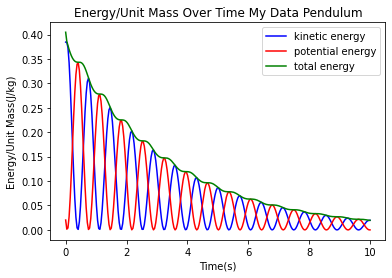

In [ ]:
expected_vel_x = np.gradient(expected_x, expected_time)
expected_theta = expected_x / 0.5
expected_KE = kinetic_energy_unit(expected_vel_x)
expected_PE = 9.8 * pendulum_length * (1 - np.cos(expected_theta))
expected_total = expected_KE + expected_PE
plt.title("Energy/Unit Mass Over Time My Data Pendulum")
plt.xlabel("Time(s)")
plt.ylabel("Energy/Unit Mass(J/kg)")
plt.plot(expected_time, expected_KE, color = 'blue', label = 'kinetic energy')
plt.plot(expected_time, expected_PE, color = 'red', label = 'potential energy')
plt.plot(expected_time, expected_total, color = 'green', label = 'total energy')
plt.legend()

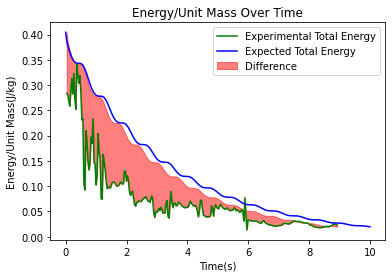

In [ ]:
#change time size, compare each point to ideal graph or something and find percent error 
#plt.errorbar(time, (expected_total + energy), yerr = expected_total - energy, alpha = 0.5, color = 'red')
plt.fill_between(time, expected_total, energy, color = 'red', alpha = 0.5, label = 'Difference')
plt.title("Energy/Unit Mass Over Time")
plt.xlabel("Time(s)")
plt.ylabel("Energy/Unit Mass(J/kg)")
plt.plot(time, energy, color = 'green', label = 'Experimental Total Energy')
plt.plot(expected_time, expected_total, color = 'blue', label = 'Expected Total Energy')
plt.legend()
#plt.plot(expected_time, expected_total - pendulum_energy)

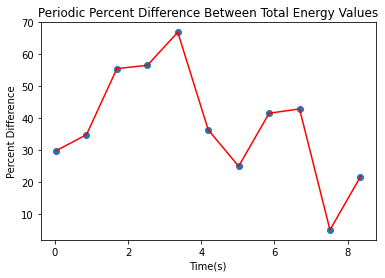

In [ ]:
percent_dif = np.absolute(energy - expected_total)/expected_total * 100
percent_dif = percent_dif[0::25]
time = time[0::25]
plt.title("Periodic Percent Difference Between Total Energy Values")
plt.xlabel("Time(s)")
plt.ylabel("Percent Difference")
plt.scatter(time, percent_dif)
plt.plot(time, percent_dif, color = 'red')
#percent dif starts to decrease, high at first because of slippage due to apparatus setup

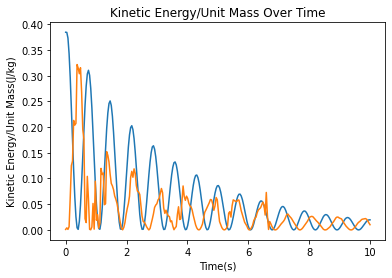

In [ ]:
plt.title("Kinetic Energy/Unit Mass Over Time")
plt.xlabel("Time(s)")
plt.ylabel("Kinetic Energy/Unit Mass(J/kg)")
plt.plot(expected_time, expected_KE, label = "Expected KE")
plt.plot(expected_time, ke, label = "Experimental KE")